В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. **Обратите внимание**: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

**Review criteria**

Решение должно представлять собой IPython-ноутбук, содержащий:
1. код, генерирующий выборки и графики;
2. краткие описания каждого блока кода, объясняющие, что он делает;
3. необходимые графики (убедитесь, что на них подписаны оси);
4. выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
5. выводы по результатам выполнения задания.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sts
from scipy.stats import kstwobign

%matplotlib inline

### 1 Строим гистограмму и график теоретической функции плотности распределения Колмогорова

In [41]:
rv = kstwobign()
sample_sz = 1000
sample = rv.rvs(size=sample_sz)
x = np.linspace(kstwobign.ppf(0.0001), kstwobign.ppf(0.9999), sample_sz)

Text(0.5, 1.0, "Kolmogorov's distribution density")

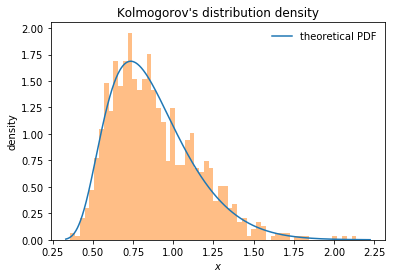

In [100]:
plt.plot(x, rv.pdf(x), label='theoretical PDF')
plt.hist(sample, bins=60, normed=True, histtype='stepfilled', alpha=0.5)
plt.ylabel('density')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.title("Kolmogorov's distribution density")

### 2 Аппроксимируем распределение значений выборочных средних

Генерируем выборки и считаем выборочное среднее для каждой из выборок в группе одинакового размера

In [111]:
samples_vols  = [5, 10, 50, 70, 100]
samples_count = 1000
all_samples = []
all_samples_means = []

for n in samples_vols:
    all_samples.append([rv.rvs(size=n) for i in range(samples_count)])
    
for samples in all_samples:
    all_samples_means.append(np.array([s.sum()/s.shape[0] for s in samples]))  

Вычисляем теоретические статистики центральной тенденции и разброса выбранного непрерывного распределения

In [112]:
mean, var, skew, kurt = rv.stats(moments='mvsk')
print(mean, var)

0.8687311606312806 0.06777320397409947


Строим гистограммы полученных выборочных средних

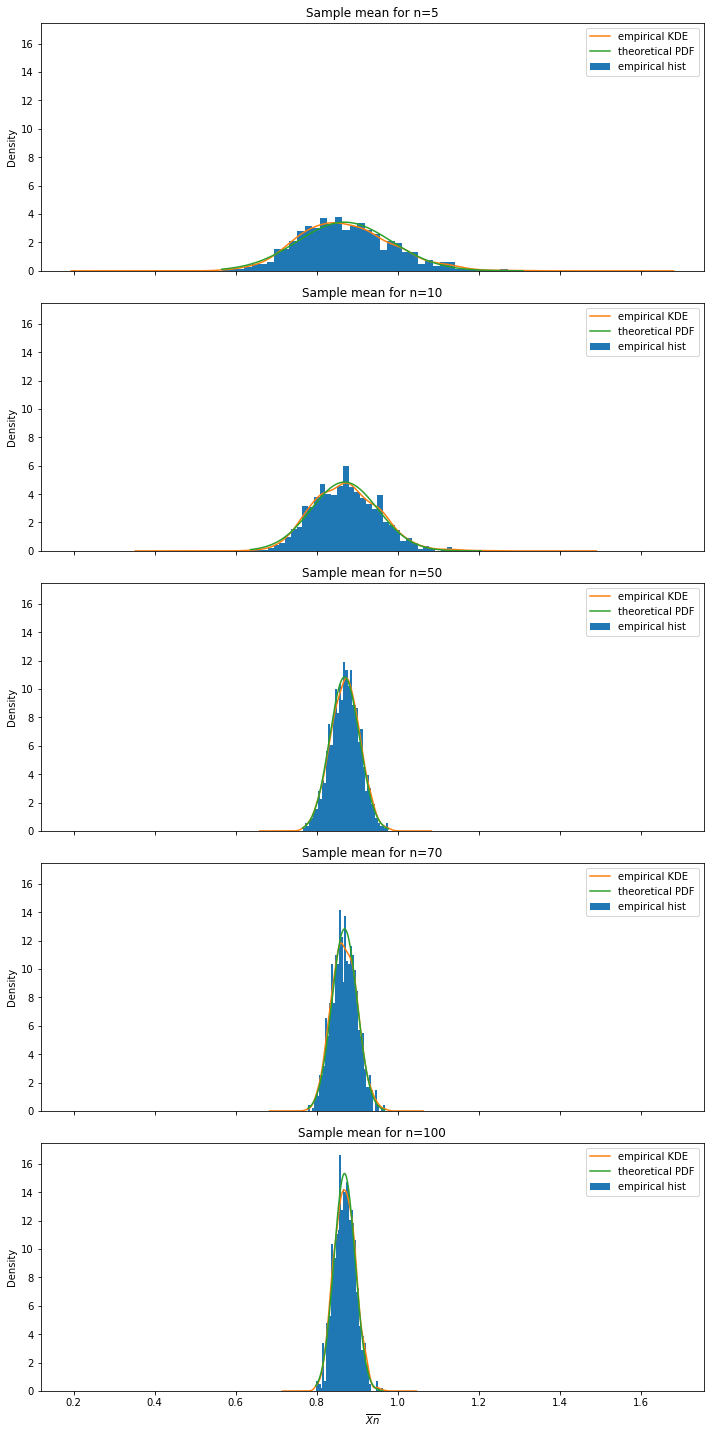

In [113]:
fig, axs = plt.subplots(len(samples_vols), 1, figsize = (10, 20), sharey='all', sharex='all')

for i, means in enumerate(all_samples_means):
    axs[i].hist(means, bins=40, density=True, label='empirical hist')
    axs[i].set_title(f"Sample mean for n={samples_vols[i]}")
    axs[i].set_ylabel('density')
    axs[i].set_xlabel('$\overline{Xn}$')
    
    # Визуалиризуем эмпирическую оценку плотности, полученной с помощью ядерного сглаживания
    pd.DataFrame(means, columns=['empirical KDE']).plot(kind='density', ax=axs[i])

    # Создаём нормально распределённую случайную величину, которая приближает оценку выборочного среднего
    # по выборкам размера n = samples_vols[i]
    # Дисперсия нормального распределения, аппроксимирующего выборочное среднее при n равно var/n
    x = np.linspace(means.min(), means.max(), 1000)
    norm_rv = sts.norm(mean, np.sqrt(var/samples_vols[i]))
    
    axs[i].plot(x, norm_rv.pdf(x), label='theoretical PDF')
    
    axs[i].legend()
    
fig.tight_layout(pad=1.0)

Разницу между полученными распределениями при различных значениях **n** состоит в том, что при бОльших значениях **n**
значения выборочных средних ближе концентрируются вокруг теоретического значения математического ожидания распределения Колмогорова, имея меньшую дисперсию. Это видно на графиках выше. Так, на первом графике гистограмма растянута вдоль оси х. На последующих графиках гистограмма вытягивается вдоль оси y и сжимается вдоль оси х в окрестности точки математического ожидания 0.8687311606312806.

Таким образом, с ростом **n** точность аппроксимации распределения выборочных средних нормальным увеличивается: всё больше и больше выборок из исходных 1000 имеют выборочного среднее близкое к теоретическому ~0.87?

### Выводы

В ходе проделанной работы было показано согласие следсвий Центральной Предельной Теоремы с практическими результатами, полученными для множества выборок из распределения Колмогорова. А именно, выборочные средние исследуюемых выборок являются нормальной случайной величиной с матожиданием равным матожиданию распределения Колмогорова и дисперсией, равной дисперсии распределения Колмогорова, делённой на объём исследуемой выборки.  